# Example notebook of a Sample QC analysis

The present notebook serves as a guide of how use the `IDEAL-QC` library to perform a sample quality control. We intend to show a possible use, because each user can adapt it to its particular needs.

The first step is to import the required libraries.

In [1]:
import sys
import os

import pandas as pd

# add parent directory to path
library_path = os.path.abspath('..')
if library_path not in sys.path:
    sys.path.append(library_path)

from cge_comrare_pipeline.SampleQC import SampleQC

In the next widgets the user must input the the paths and filenames needed to perform the sample QC.

1. `input_path`: the path to the folder where the raw data in PLINK (`.bed`, `.bim`, `.fam`) files is.
2. `input_name`: the prefix of the PLINK files. It is not required the name of the three files, since the extension is deduced from the PLINK format.
3. `dependables_path`: path to the folder where external files needed to perform the QC are. In this cases, the QC requires a file with high LD regions. The file should be named as `high-LD-regions.txt`.
4. `output_path`: the path to the folder where the outputs from each steps are going to be.
5. `output_name`: the prefix of the cleaned PLINK files.

In [2]:
import ipywidgets as widgets
from IPython.display import display

# Create interactive widgets for input
input_path = widgets.Text(
    value='/home/luis/data/rawdata-sexupdated/inputData',
    description='Path to input plink1.9 files:',
    style={'description_width': 'initial'}
)

input_name = widgets.Text(
    value='luxgiant_data_combined_12098-updated-sex',
    description='Name of the plink1.9 files:',
    style={'description_width': 'initial'}
)

dependables_path = widgets.Text(
    value='/home/luis/data/rawdata-sexupdated/dependables/',
    description='Path to dependable files:',
    style={'description_width': 'initial'}
)

output_path = widgets.Text(
    value='/home/luis/data/rawdata-sexupdated/outputData/',
    description='Path to output files:',
    style={'description_width': 'initial'}
)
output_name = widgets.Text(
    value='luxgiant_res',
    description='Name of the resulting files:',
    style={'description_width': 'initial'}
)
# Display the widgets
display(input_path, input_name, dependables_path, output_path, output_name)

# Function to get the text parameter values
def get_params():
    return input_path.value, input_name.value, dependables_path.value, output_path.value, output_name.value

Text(value='/home/luis/data/rawdata-sexupdated/inputData', description='Path to input plink1.9 files:', style=…

Text(value='luxgiant_data_combined_12098-updated-sex', description='Name of the plink1.9 files:', style=TextSt…

Text(value='/home/luis/data/rawdata-sexupdated/dependables/', description='Path to dependable files:', style=T…

Text(value='/home/luis/data/rawdata-sexupdated/outputData/', description='Path to output files:', style=TextSt…

Text(value='luxgiant_res', description='Name of the resulting files:', style=TextStyle(description_width='init…

In [3]:
# Use the parameter values
path_params = get_params()
print(f"Input Path: {path_params[0]}")
print(f"Input Name: {path_params[1]}")
print(f"Dependables: {path_params[2]}")
print(f"Output Path: {path_params[3]}")
print(f"Output Name: {path_params[4]}")

Input Path: /home/luis/data/rawdata-sexupdated/inputData
Input Name: luxgiant_data_combined_12098-updated-sex
Dependables: /home/luis/data/rawdata-sexupdated/dependables/
Output Path: /home/luis/data/rawdata-sexupdated/outputData/
Output Name: luxgiant_res


In the next widgets, please provide the parameters to run the required commands. Most of them are common `PLINK1.9` and `PLINK2.0` parameters. 

In [ ]:
# Create interactive widgets for list input
ind_par = widgets.Textarea(
    value='50, 5, 0.2',
    description='indep pairwise (comma-separated):',
    style={'description_width': 'initial'}
)

mind = widgets.FloatText(
    value=0.2,  # Default value
    description='mind (float):',
    style={'description_width': 'initial'}
)

sex_check = widgets.Textarea(
    value = '',
    description='sex check (comma-separated):',
    style={'description_width': 'initial'}
)

het_deviation = widgets.FloatText(
    value=3,  # Default value
    description='deviation from the mean heterozigosity rate (float):',
    style={'description_width': 'initial'}
)

maf = widgets.FloatText(
    value=0.01,  # Default value
    description='maf (float):',
    style={'description_width': 'initial'}
)

kingship = widgets.FloatText(
    value=0.354,  # Default value
    description='kingship (float):',
    style={'description_width': 'initial'}
)

# display the widgets
display(ind_par, mind, sex_check,het_deviation, maf, kingship)

def get_sample_qc_params():

    sample_qc_params = dict()

    indep = ind_par.value.split(',')
    sex = sex_check.value.split(',')

    sample_qc_params['maf'] = maf.value
    sample_qc_params['mind']= mind.value
    sample_qc_params['kingship'] = kingship.value
    sample_qc_params['indep'] = [int(indep[0]), int(indep[1]), float(indep[2])]
    sample_qc_params['het_deviation'] = het_deviation.value
    if sex!=['']:
        sample_qc_params['sex_check'] = [float(x) for x in sex]
    else:
        sample_qc_params['sex_check'] = []

    return sample_qc_params

Textarea(value='50, 5, 0.2', description='indep pairwise (comma-separated):', style=TextStyle(description_widt…

FloatText(value=0.2, description='mind (float):', style=DescriptionStyle(description_width='initial'))

Textarea(value='', description='sex check (comma-separated):', style=TextStyle(description_width='initial'))

FloatText(value=3.0, description='deviation from the mean heterozigosity rate (float):', style=DescriptionStyl…

FloatText(value=0.01, description='maf (float):', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.354, description='mind (float):', style=DescriptionStyle(description_width='initial'))

In [5]:
sample_params = get_sample_qc_params()
sample_params

{'maf': 0.01,
 'mind': 0.2,
 'kingship': 0.354,
 'indep': [50, 5, 0.2],
 'het_deviation': 3.0,
 'sex_check': []}

Initialize the class `SampleQC`.

In [6]:
sample = SampleQC(
    input_path      =input_path.value,
    input_name      =input_name.value,
    output_path     =output_path.value,
    output_name     =output_name.value,
    dependables_path=dependables_path.value,
)

Execute the pipeline steps of the sample quality control. Since the ides of a notebook is to build a more interactive interface, the next steps do not drop the samples failing QC, they just find the samples.

In [7]:
sample_qc_steps = {
    'rename SNPs'           : (sample.execute_rename_snps, (True,)),
    'hh_to_missing'         : (sample.execute_haploid_to_missing, ()),
    'ld_pruning'            : (sample.execute_ld_pruning, (sample_params['indep'],)),
    'miss_genotype'         : (sample.execute_miss_genotype, (sample_params['mind'],)),
    'sex_check'             : (sample.execute_sex_check, (sample_params['sex_check'])),
    'heterozygosity'        : (sample.execute_heterozygosity_rate, (sample_params['maf'],)),
    'duplicates_relatedness': (sample.execute_dup_relatedness, (sample_params['kingship'],))
}

step_description = {
    'rename SNPs'           : 'Rename SNPs to chr:pos:ref:alt',
    'hh_to_missing'         : 'Solve hh warnings by setting to missing',
    'ld_pruning'            : 'Perform LD pruning',
    'miss_genotype'         : 'Get samples with high missing rate',
    'sex_check'             : 'Get samples with discordant sex information',
    'heterozygosity'        : 'Get samples with high heterozygosity rate',
    'duplicates_relatedness': 'Get samples with high relatedness rate or duplicates'
}

for name, (func, params) in sample_qc_steps.items():
    print(f"\033[1m{step_description[name]}.\033[0m")
    func(*params)

Rename SNPs to chr:pos:ref:alt.
               old           new
0      1:49554-G-A   1:49554:G:A
1     JHU_1.115745  1:115746:T:C
2     JHU_1.534237  1:598858:C:A
3  chr1:629488:T:C  1:629488:T:C
4        rs9701055  1:630053:T:C
   0             1  2       3  4  5
0  1   1:49554:G:A  0   49554  G  A
1  1  1:115746:T:C  0  115746  T  C
2  1  1:598858:C:A  0  598858  C  A
3  1  1:629488:T:C  0  629488  T  C
4  1  1:630053:T:C  0  630053  T  C
PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/rawdata-sexupdated/inputData/luxgiant_data_combined_12098-updated-sex-renamed.log.
Options in effect:
  --bfile /home/luis/data/rawdata-sexupdated/inputData/luxgiant_data_combined_12098-updated-sex
  --make-bed
  --out /home/luis/data/rawdata-sexupdated/inputData/luxgiant_data_combined_12098-updated-sex-renamed

63927 MB RAM detected; reserving 31963 MB for main work

Here a small dashboard with a report of the call rate missingness is shown. The cap on the Y-axis can be selected without re-running the whole pipeline, so it can be selected according to each user need. Moreover, the plots could help to choose the best call rate threshold according to the data.

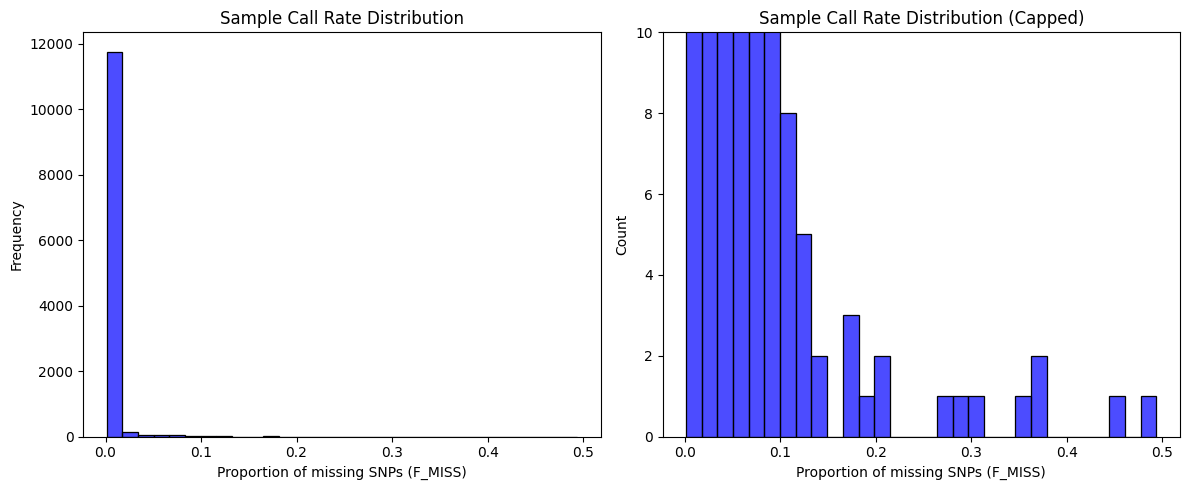

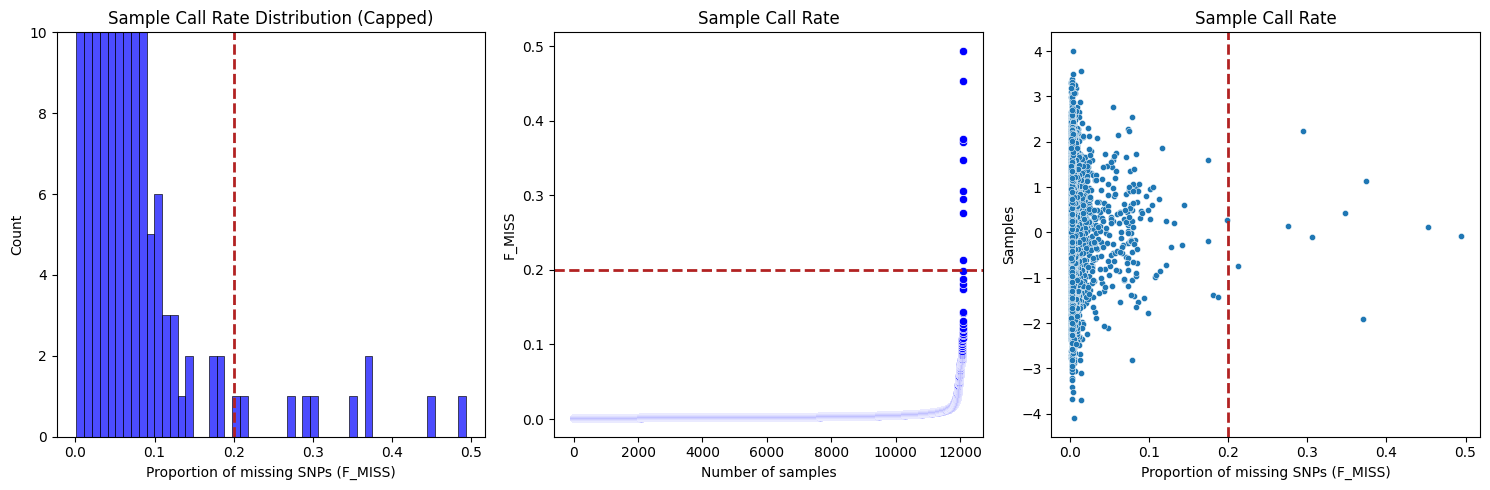

In [8]:
fail_call_rate = sample.report_call_rate(
            directory    =sample.results_dir, 
            filename     =sample.call_rate_miss, 
            threshold    =sample_params['mind'],
            plots_dir    =sample.plots_dir, 
            y_axis_cap   =10
        )

Now, the samples failing sex check are collected and a plot is shown where the user can check the number of problematic samples.

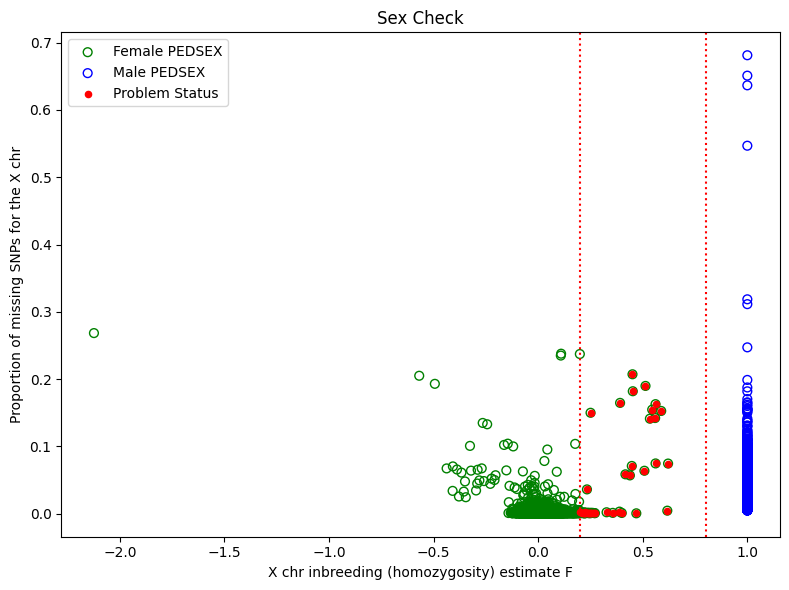

In [9]:
fail_sexcheck = sample.report_sex_check(
            directory          =sample.results_dir, 
            sex_check_filename =sample.sexcheck_miss, 
            xchr_imiss_filename=sample.xchr_miss,
            plots_dir          =sample.plots_dir
        )

Here a small dashboard with a report of the heterozigosity is shown. The cap on the Y-axis can be selected without re-running the whole pipeline, so it can be selected according to each user need. Moreover, the plots could help to choose a different deviation from the mean of the heterozigosity rate. Notice that the analysis has been divided for SNPs having a MAF of less than 1% and those above that threshold.

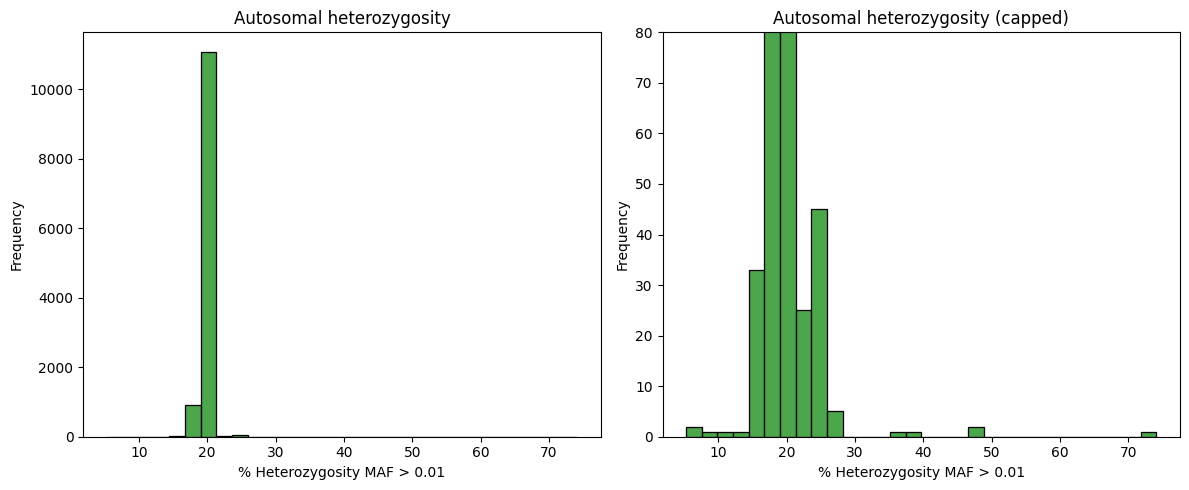

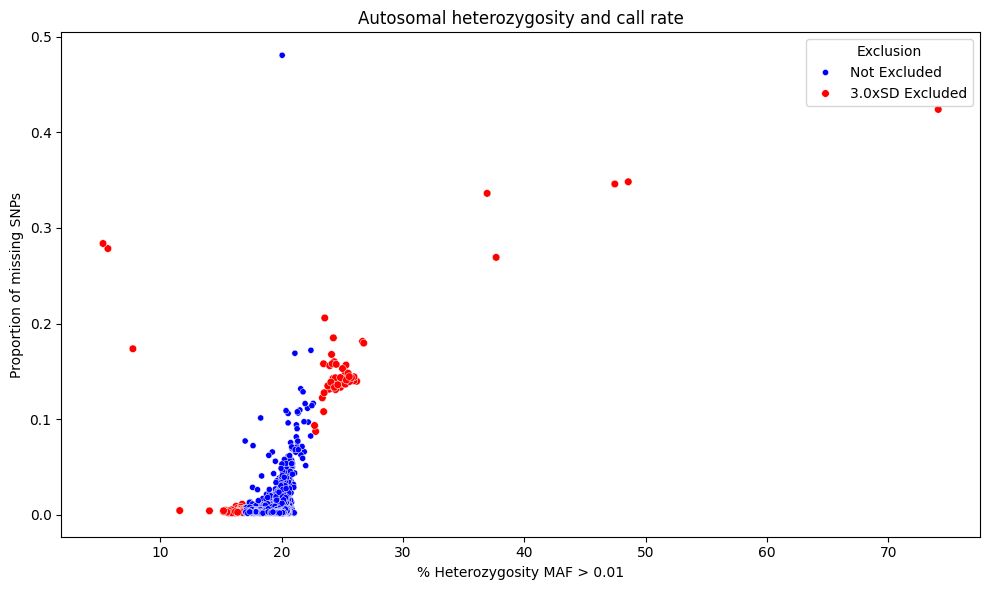

In [10]:
fail_het_greater = sample.report_heterozygosity_rate(
            directory           = sample.results_dir, 
            summary_ped_filename= sample.summary_greater, 
            autosomal_filename  = sample.maf_greater_miss, 
            std_deviation_het   = sample_params['het_deviation'],
            maf                 = sample_params['maf'],
            split               = '>',
            plots_dir           = sample.plots_dir
        )

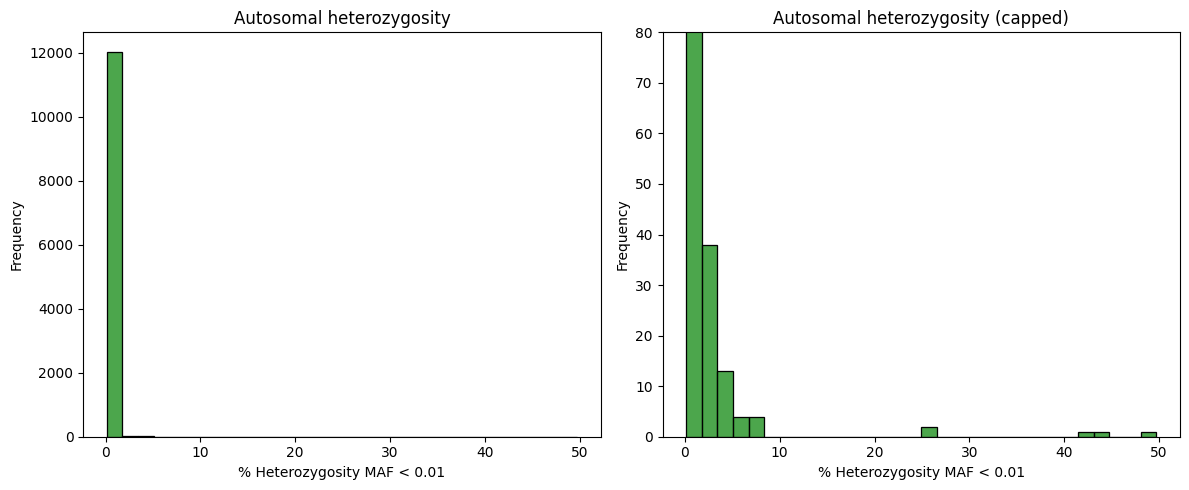

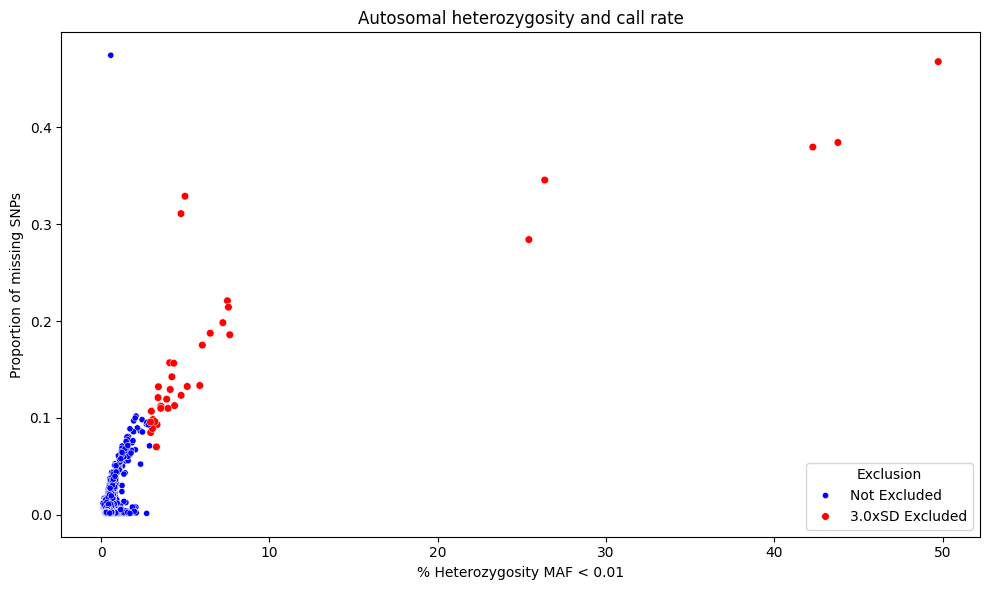

In [11]:
fail_het_gless= sample.report_heterozygosity_rate(
            directory           = sample.results_dir, 
            summary_ped_filename= sample.summary_less, 
            autosomal_filename  = sample.maf_less_miss, 
            std_deviation_het   = sample_params['het_deviation'],
            maf                 = sample_params['maf'],
            split               = '<',
            plots_dir           = sample.plots_dir
        )

In [12]:
fail_dup_relatednes = pd.read_csv(
            sample.kinship_miss,
            sep=r'\s+',
            engine='python'
        )

# filter samples that failed duplicates and relatedness check
fail_dup_relatednes.columns = ['FID', 'IID']
fail_dup_relatednes['Failure'] = 'Duplicates and relatedness'

All failing samples are collected and concatenated in a single pandas DataFrame and saved. A summary of the amount of samples failing each step is shown. 

In [13]:
df_fails = pd.concat(
    [fail_call_rate, fail_sexcheck, fail_het_greater, fail_het_gless, fail_dup_relatednes],
    ignore_index=True
)

total_fails = df_fails.shape[0]
duplicates = df_fails.duplicated(subset=['FID', 'IID']).sum()
summary = df_fails['Failure'].value_counts().reset_index()

df_fails = df_fails.drop_duplicates(subset=['FID', 'IID'])

df_fails.to_csv(
    os.path.join(sample.fails_dir, 'fail_samples.txt'), sep='\t',
    index=False
)

In [14]:
summary

,Failure,count
0,Duplicates and relatedness,362
1,Heterozygosity rate greater,117
2,Sex check,40
3,Heterozygosity rate less,36
4,Call rate,9


In [15]:
print('Total samples failing QC: ', total_fails)
print('Number of duplicated samples: ', duplicates)
print('Unique samples failing QC: ', total_fails-duplicates)

Total samples failing QC:  564
Number of duplicated samples:  53
Unique samples failing QC:  511


Finally, the failing samples are dropped and cleaned `PLINK` files are generated.

In [16]:
sample.execute_drop_samples()
sample.execute_recover_snp_names(rename=True)

PLINK v1.90b7.4 64-bit (18 Aug 2024)           www.cog-genomics.org/plink/1.9/
(C) 2005-2024 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to /home/luis/data/rawdata-sexupdated/outputData/sample_qc_results/clean_files/luxgiant_res-clean-samples.log.
Options in effect:
  --bfile /home/luis/data/rawdata-sexupdated/inputData/luxgiant_data_combined_12098-updated-sex-hh-missing
  --make-bed
  --out /home/luis/data/rawdata-sexupdated/outputData/sample_qc_results/clean_files/luxgiant_res-clean-samples
  --remove /home/luis/data/rawdata-sexupdated/outputData/sample_qc_results/fail_samples/fail_samples.txt

63927 MB RAM detected; reserving 31963 MB for main workspace.
1842636 variants loaded from .bim file.
12098 people (8066 males, 4032 females) loaded from .fam.
12098 phenotype values loaded from .fam.
--remove: 11587 people remaining.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 11587 founders and 0 nonfounders present.
Calcu

{'pass': True,
 'step': 'recover_snp_names',
 'output': {'plink_out': '/home/luis/data/rawdata-sexupdated/outputData/sample_qc_results/clean_files'}}